In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

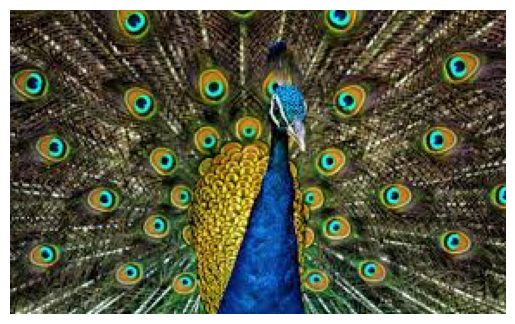

In [24]:
img = plt.imread('image.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
type(img) #Reads the image as a numpy array in the form of RGB values

numpy.ndarray

In [26]:
print(img.shape)  # Prints the shape of the image array (height/row, width, channels) and for grayscale the channel should be 1
print(img.size)   # Prints the total number of pixels in the image (height or row * width * channels)

(176, 287, 3)
151536


In [27]:
# Image contains only 2 parameters no of pixels and no of channels
w,h,d = img.shape
image_array = img.reshape((w * h, d))  # Reshape the image to a 2D array of pixels
print(image_array.shape)  # Prints the shape of the reshaped image array (total pixels, channels)

# To Normalize the pixel values to the range [0, 1]
image_array = image_array / 255.0  # 255 because its the maximum intensity value

(50512, 3)


In [28]:
# Abstracting the small subset of the image and training the model and then predict for the whole image
from sklearn.utils import shuffle
image_array_sample = shuffle(image_array,random_state = 1)[:1000]  # Randomly sample 1000 pixels from the image array
image_array_sample.size

3000

In [29]:
kmeans = KMeans(n_clusters = 6, random_state= 1)
kmeans.fit(image_array_sample)  # Fit the KMeans model to the sampled image array
#centroids = kmeans.cluster_centers_  # Get the cluster centroids (representative

c:\Users\Elrhea\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=1)

In [30]:
labels = kmeans.predict(image_array)
labels

array([0, 4, 4, ..., 0, 4, 1])

In [31]:
print(kmeans.cluster_centers_)
c = kmeans.cluster_centers_

[[0.11491139 0.10849673 0.05569706]
 [0.44173174 0.42193302 0.27948985]
 [0.68282698 0.66408102 0.47269985]
 [0.04847059 0.30235294 0.57709804]
 [0.26212781 0.25428468 0.15795207]
 [0.22461874 0.78779956 0.76492375]]


In [32]:
#Creating original image with the labels
def recreate_image(c,labels,w,h,d):
    image = np.zeros((w,h,d))
    label_idx = 0
#Now label each pixelaccording to the limited labels

    for i in range(w):
        for j in range(h):
            image[i][j] = c[labels[label_idx]]
            label_idx += 1
    return(image)
#All the pixels/points are now assigned to a particular centroid

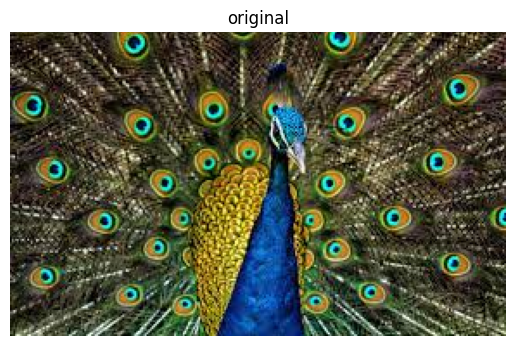

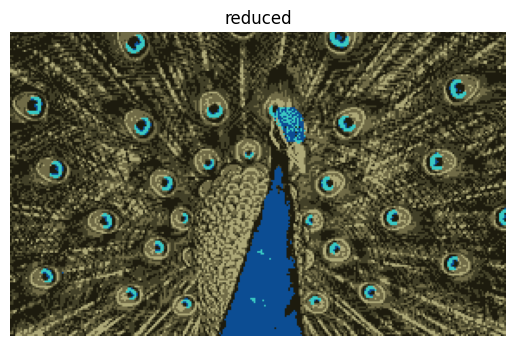

In [33]:
plt.figure(1)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title('reduced')
plt.imshow(recreate_image(c,labels,w,h,d))
plt.show()

### *Agglomerative Clustering*

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

n_clusters = 16  # or any number you choose

# Fit on the sampled data only (fast)
agg = AgglomerativeClustering(n_clusters=n_clusters)
agg.fit(image_array_sample)

# Train a classifier to generalize cluster labels to the full image
clf = NearestCentroid()
clf.fit(image_array_sample, agg.labels_)

# Predict labels for all pixels in the image
labels = clf.predict(image_array)

# Compute centroids (mean color for each cluster)
centroids = np.array([
    image_array[labels == i].mean(axis=0) if np.any(labels == i) else np.zeros(3)
    for i in range(n_clusters)
])


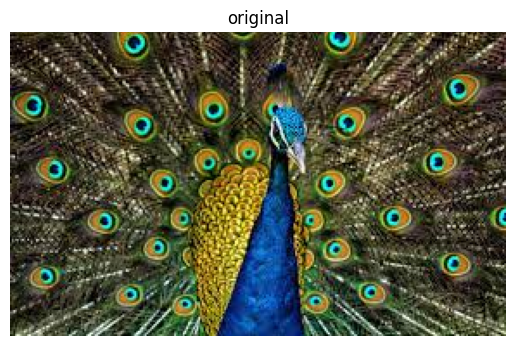

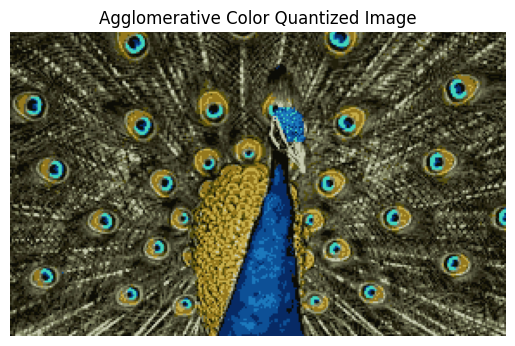

In [ ]:
def recreate_image(centroids, labels, w, h, d):
    result = np.zeros((w * h, d))
    for i, label in enumerate(labels):
        result[i] = centroids[label]
    return result.reshape((w, h, d))

quantized_img = recreate_image(centroids, labels, w, h, d)

# Convert back to 0–255 for display
quantized_img = (quantized_img * 255).astype(np.uint8)

# Display the result
plt.figure(1)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.imshow(quantized_img)
plt.axis('off')
plt.title('Agglomerative Color Quantized Image')
plt.show()
